#cars Recognizer
The goal of this project is to classify the logos of 20 different car brands from around the world. The types are following: <br/>

* Audi car logo
* BMW car logo
* Chevrolet car logo
* Dodge car logo
* Ford car logo
* Honda car logo
* Hyundai car logo
* Jaguar car logo
* Jeep car logo
* Kia car logo
* Land Rover car logo
* Lexus car logo
* Mazda car logo
* Mercedes-Benz car logo
* Nissan car logo
* Porsche car logo
* Subaru car logo
* Tesla car logo
* Toyota car logo
* Volkswagen car logo




##Setting up the necessary things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32
version = 1

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/MasterCourseML/week-8/logo classification

/content/drive/My Drive/MasterCourseML/week-8/logo classification


In [ ]:
ls

 data/  'data loaders'/   models/   test_images/


In [ ]:
# not necessary. to zip the data that i have collected and save it to drive
# !zip -r '/content/drive/My Drive/MasterCourseML/week-8/cap recognizer/cap_data.zip' '/content/drive/My Drive/MasterCourseML/week-8/cap recognizer/data'

#Confusion matrix

In [ ]:
model = load_learner(model_path)
data_path = "data"

In [ ]:
#create confusion matrix
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

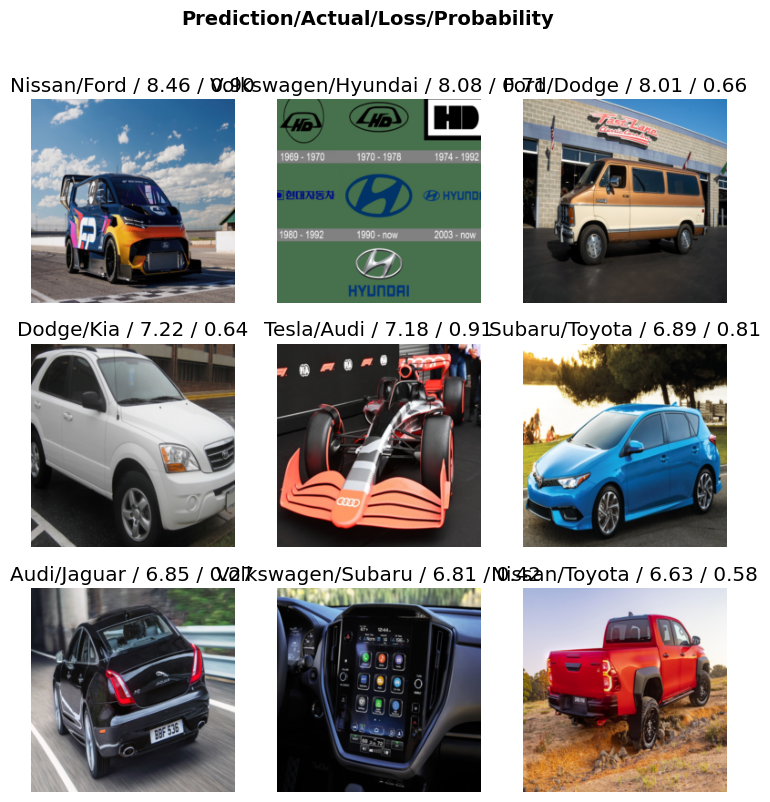

In [ ]:
#plot images for top losses
interp.plot_top_losses(9, nrows=3)

##cleaning
* replace/delete the images that are irrelevant
* for better accuracy clean the data, train the model and save the pkl file as different version name

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
#delete after cleaning
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()            #delete irrelevant data

for idx, cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}")      #change the directory